<a href="https://colab.research.google.com/github/ShutSV/data-science-1/blob/main/2023_01_04_%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%82%D0%BE%D1%80%D1%8B_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Сравнение моделей машинного обучения метода классификации данных

Перечень моделей:
- catboost
- градиентный бустинг
- ADAboost
- Extra Trees
- QuadraticDiscriminantAnalysis
- lightgbm
- KNeighborsClassifier
- DecisionTreeClassifier
- xgboost
- DummyClassifier
- svm
- RandomForestClassifier

# -- Датасет Wine --

In [ ]:
# Загрузка и разделение данных на обучающий и тестовый наборы
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

data = load_wine()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Catboost
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.0 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Определение базовых классификаторов
base_classifiers = [
    ('catboost', CatBoostClassifier(iterations=100, depth=3, learning_rate=0.2, loss_function='MultiClass', random_state=42, verbose=0)),
    ('gradientboost', GradientBoostingClassifier(n_estimators=5, max_depth=3, learning_rate=0.1, random_state=42)),
    ('adaboost', AdaBoostClassifier(n_estimators=5, random_state=42)),
    ('extratrees', ExtraTreesClassifier(n_estimators=5, random_state=42)),
    ('quadraticda', QuadraticDiscriminantAnalysis()),
    ('lgbmClassif', LGBMClassifier(random_state=42)),
    ('kNeighbors', KNeighborsClassifier(n_neighbors=5)),
    ('decisiontree', DecisionTreeClassifier(random_state=42)),
    ('xgboostClas', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)),
    ('dummyClass', DummyClassifier(strategy="most_frequent", random_state=42)),
    ('svm-SVC', SVC(kernel='linear', random_state=42)),
    ('rndforest', RandomForestClassifier(n_estimators=5, random_state=42)),
    ('logregress', LogisticRegression(solver='liblinear', random_state=42))
]

In [ ]:
# Создание моделей, их обучение на обучающем наборе данных, и предсказание классов на тестовом наборе данных
result_models = {}
for i in base_classifiers:
  model = i[1]
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  result_models[i[0]] = y_pred

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000197 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 453
[LightGBM] [Info] Number of data points in the train set: 124, number of used features: 13
[LightGBM] [Info] Start training from score -1.131402
[LightGBM] [Info] Start training from score -0.908259
[LightGBM] [Info] Start training from score -1.293921
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

In [ ]:
# Формирование метрики Precision по классам
from sklearn.metrics import classification_report

result_precision = []
for res in result_models:
  report = classification_report(y_test, result_models.get(res), digits=2, output_dict=True)
  result_precision.append((res, [round(report.get(y_class).get("precision"), 2) for y_class in ("0", "1", "2")]))
  # rep = classification_report(y_test, result_models.get(res), digits=2, output_dict=False)
  # print(rep)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


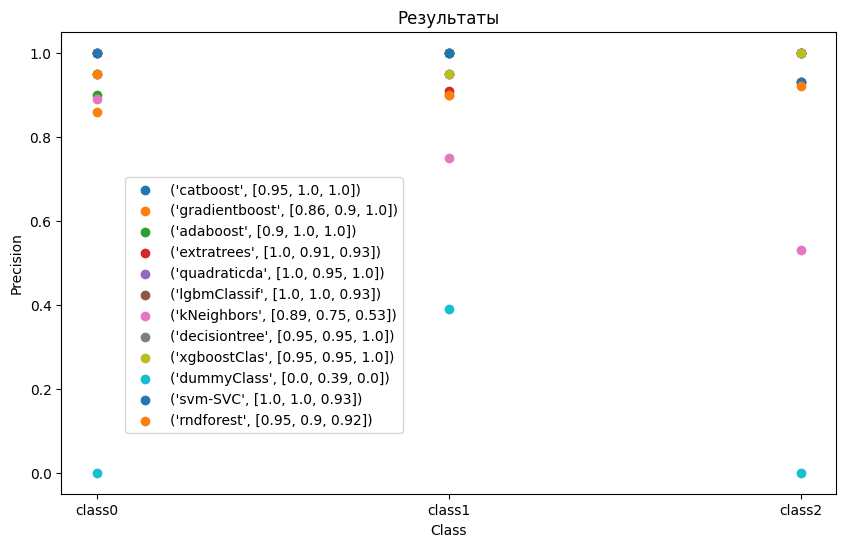

In [ ]:
# Визуализация метрик
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

a = 0
for row in result_precision:
  if min(row[1]) < 1:
    color_mark = "C" + str(a)
    plt.scatter(["class0", "class1", "class2"], row[1], c=color_mark, marker='o', label=row)
    a += 1

plt.title('Результаты')
plt.xlabel('Class')
plt.ylabel('Precision')
plt.legend(loc='best', bbox_to_anchor=(0.45, 0.7))
plt.show()

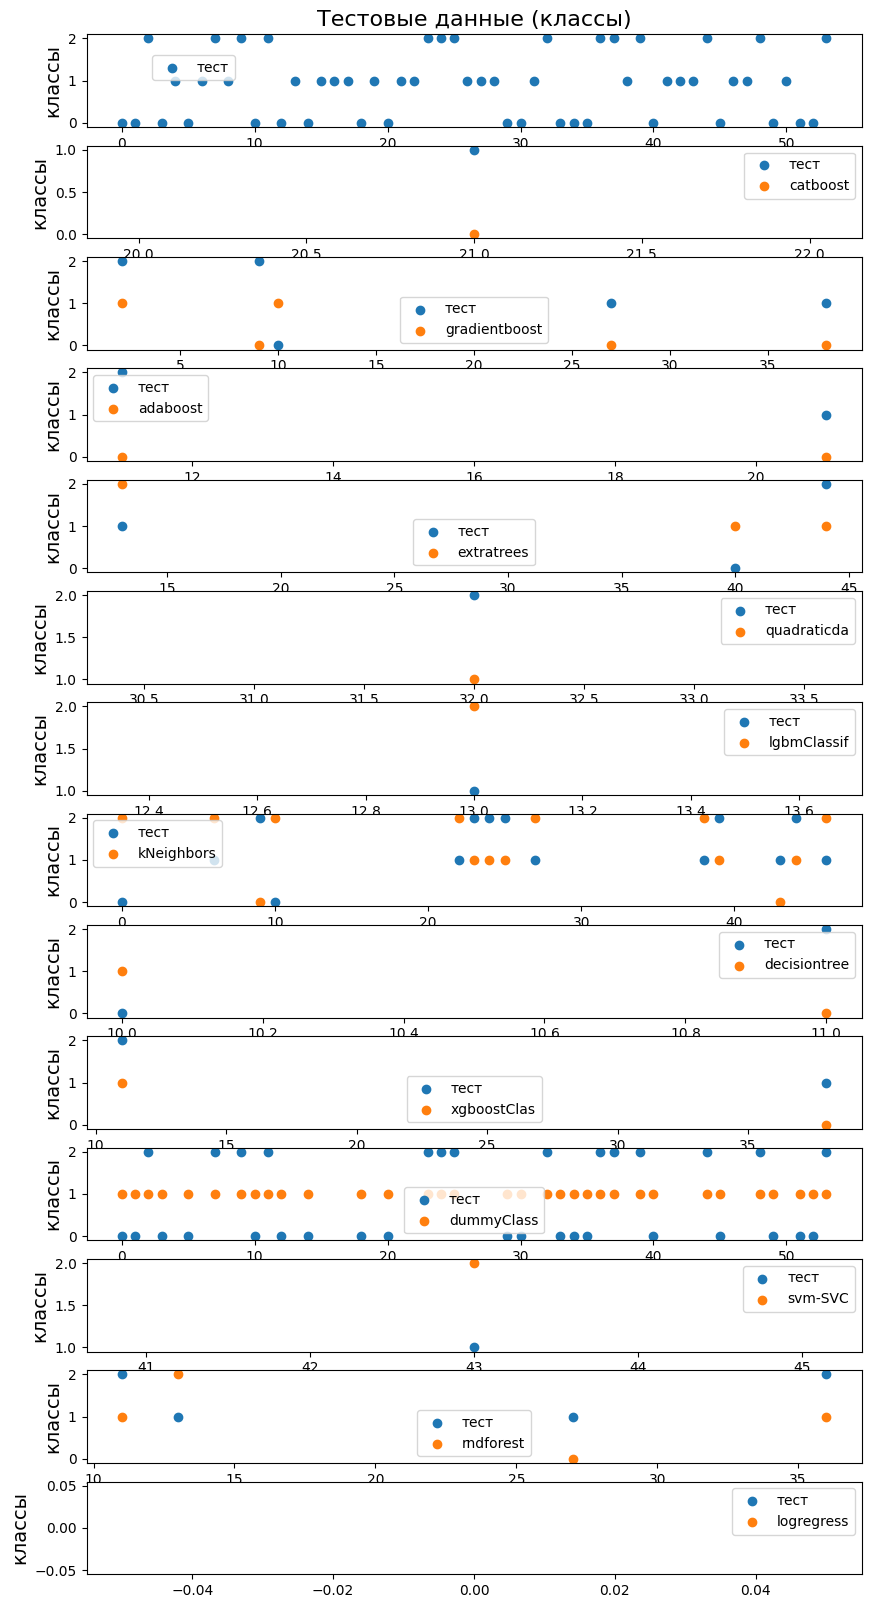

In [ ]:
# Визуализация предсказанных классов
fig, axs = plt.subplots(14, 1, figsize=(10, 20))

# настройки графика 0 (тестовые значения классов)
axs[0].set_title(f"Тестовые данные (классы)", fontsize=16)
axs[0].set_ylabel("классы", fontsize=14)
axs[0].scatter(range(len(X_test)), y_test, label=f"тест")
axs[0].legend(loc='best', bbox_to_anchor=(0.2, 0.85))

# настройка визуализации ошибок моделей
incr = 0
for model in result_models:
  x_error = list(range(len(y_test)))
  y_error = []
  y_test_show = []
  for i in x_error:
    y_error.append(None)
    y_test_show.append(None)
  for i in x_error:
    if result_models.get(model)[i] != y_test[i]:
      y_error[i] = result_models.get(model)[i]
      y_test_show[i] = y_test[i]
  incr += 1
  axs[incr].set_ylabel("классы", fontsize=14)
  axs[incr].scatter(x_error, y_test_show, label=f"тест")
  axs[incr].scatter(x_error, y_error, label=f"{model}")
  axs[incr].legend(loc='best')

plt.show()